# EDA For Financial Inclusion In Africa

In [75]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',100)

In [77]:
# Load files into a pandas dataframe
path = '../'
train = pd.read_csv(path + 'Train.csv')
test = pd.read_csv(path + 'Test.csv')
ss = pd.read_csv(path + 'SampleSubmission.csv')
variables = pd.read_csv(path + 'VariableDefinitions.csv')

In [78]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


In [79]:
display(train.head(2), test.head(2))

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent


,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private


## Data values

Below we see that :
- none of the features have any missing or null values
- most features have a small range of unique values except for household_size(20) 
    and age_of_respondent(85)
- lastly, mostly the data is non-numeric except for year, household_size and age_of_respondent which are 
    integers(int64). the rest are objects


In [80]:
pd.DataFrame({'# of unique values' : train.nunique(), 
             "# of missing values": train.isnull().sum(),
             "# of null values": train.isna().sum(),
             "DataTypes": train.dtypes
             })

,# of unique values,# of missing values,# of null values,DataTypes
country,4,0,0,object
year,3,0,0,int64
uniqueid,8735,0,0,object
bank_account,2,0,0,object
location_type,2,0,0,object
cellphone_access,2,0,0,object
household_size,20,0,0,int64
age_of_respondent,85,0,0,int64
gender_of_respondent,2,0,0,object
relationship_with_head,6,0,0,object


In [81]:
pd.DataFrame({'# of unique values' : test.nunique(), 
             "# of missing values": test.isnull().sum(),
             "# of null values": test.isna().sum(),
             "DataTypes": test.dtypes
             })

,# of unique values,# of missing values,# of null values,DataTypes
country,4,0,0,object
year,3,0,0,int64
uniqueid,7313,0,0,object
location_type,2,0,0,object
cellphone_access,2,0,0,object
household_size,18,0,0,int64
age_of_respondent,83,0,0,int64
gender_of_respondent,2,0,0,object
relationship_with_head,6,0,0,object
marital_status,5,0,0,object


## Feature distributions
Below we see that : 
- the target distribution is largely skewed towards no, meaning that there is a much much higher of people who do not have a bank account
- Also for the rest of the features we notice that:
    - Rwanda has the highest number of interviewees
    - most of the samples were recorded in 2016
    - most of the interviewees live in Rural areas
    - most of the interviewees Do not have access to a cellphone
    - interviewees' householdscan have up to 20 people
    - most of the interviewees were females
    - most of the interviewees were the heads of their households
    - most of the interviewees were married
    - most of the interviewees did not get higher than primary school
    - most of the interviewees do not have a source of income
- Also if we take a look the target, we see that:
    - for those with a bank acount there is an equal distribution in their location type, unlike those without, where most of them are from rural areas
    - for those who have a bank acount, very few of them do not have cellphone access, Unlike for those with a bank account, but they are still fewer to those with a cellphone but no bank account
    - for those who have a bank acount, their households can range up to 17 members, but for those without a bank account  they go all the way to 21

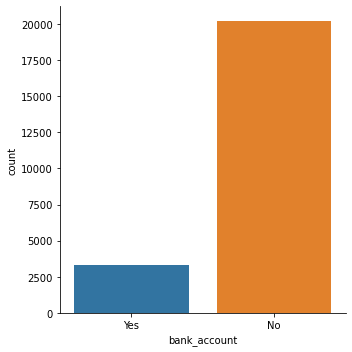

In [82]:
# Explore Target distribution 
sns.catplot(x="bank_account", kind="count", data=train)

In [83]:
cols_interested = ['country', 'year', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type']

In [84]:
# general overlook of feature distribution
def plot_distribution(data, columns, ncols, nrows, figsize, multiaxes = True):
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    for col in columns:
        data_dist = pd.DataFrame(data[col].value_counts()/len(data))
        if multiaxes:
            if columns.index(col) < round(len(columns)/2):
                sns.barplot(x = data_dist[col].index, y = data_dist[col], ax=ax[0][columns.index(col)])
            else:
                sns.barplot(x = data_dist[col].index, y = data_dist[col], ax=ax[1][columns.index(col) - round(len(columns)/2)])
        else:
            print(data_dist[col])
            sns.barplot(x = data_dist[col].index, y = data_dist[col])

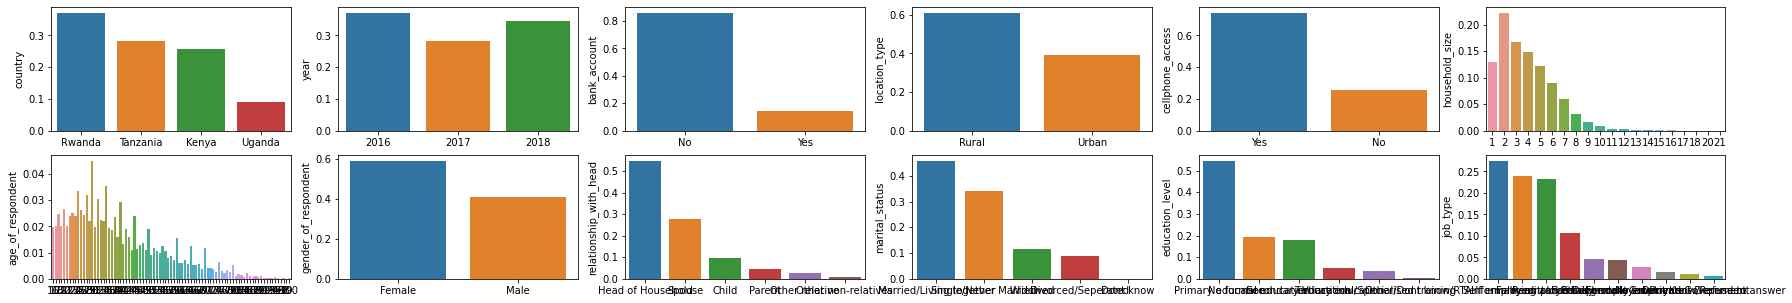

In [85]:
plot_distribution(train, cols_interested, 6, 2, (30, 5), True)

<AxesSubplot:ylabel='job_type'>

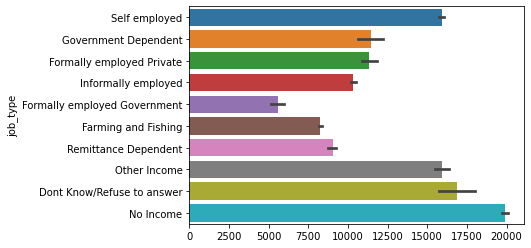

In [86]:
sns.barplot(x = train['job_type'].index, y = train['job_type'])

In [87]:
account_yes = train[train.bank_account == 'Yes']
account_no = train[train.bank_account == 'No']

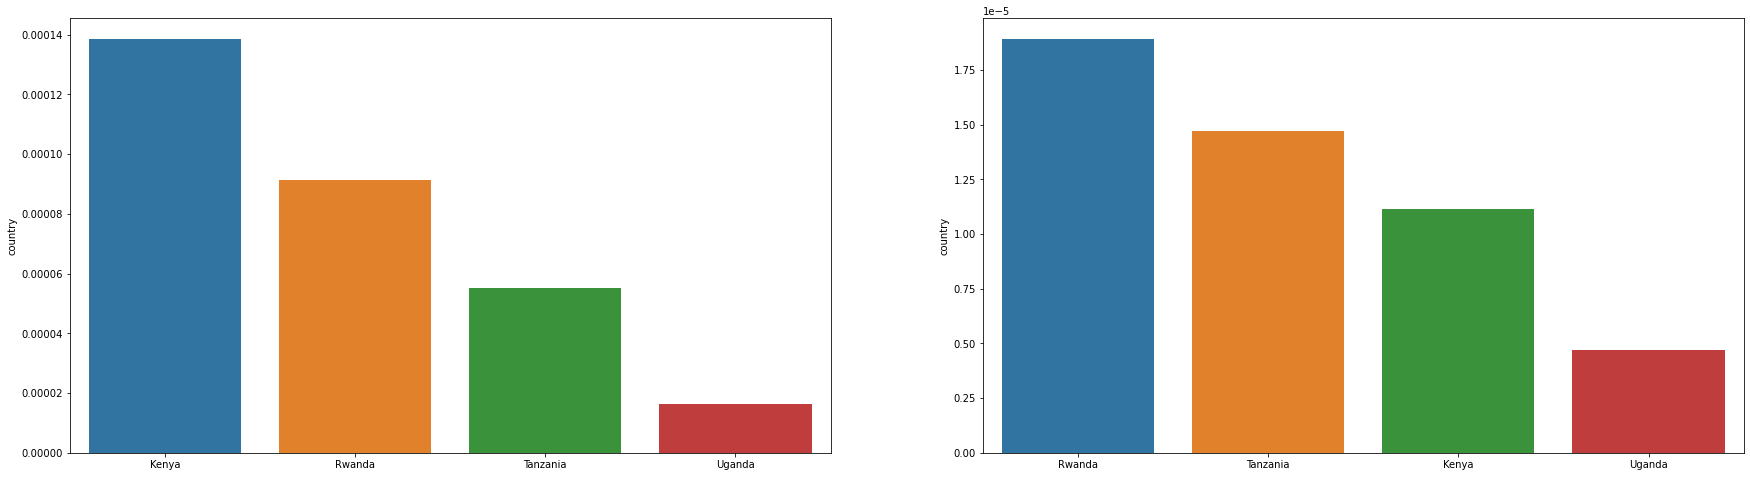

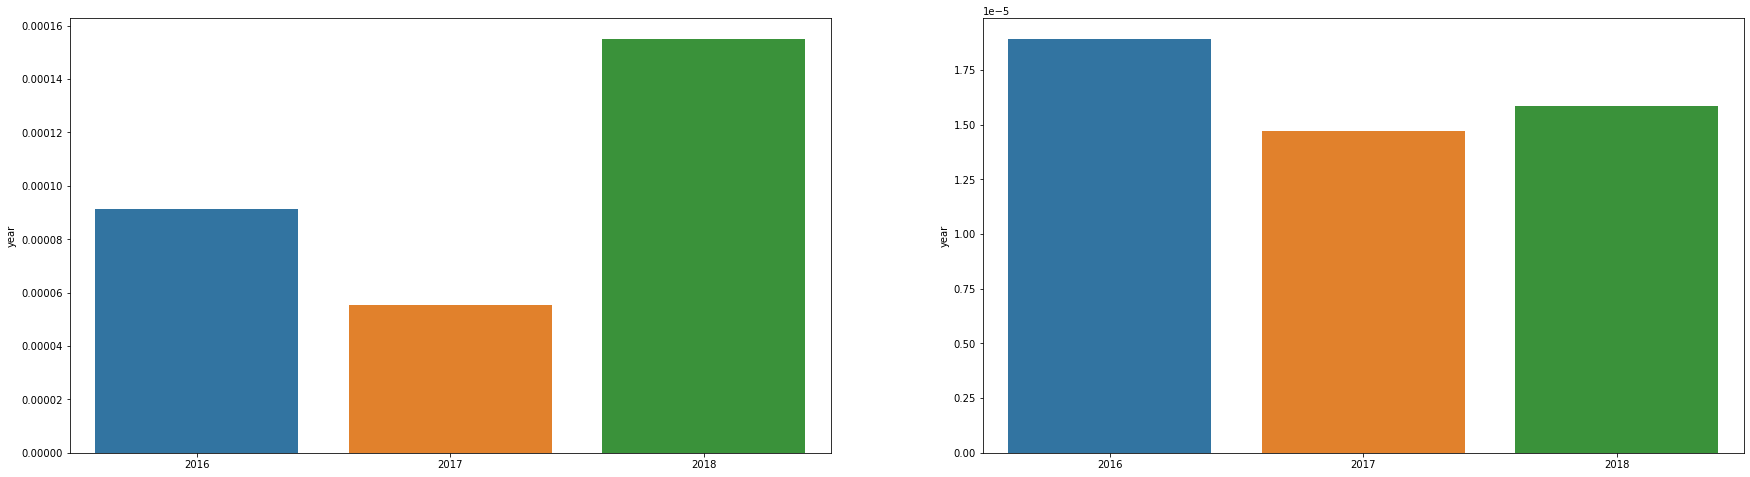

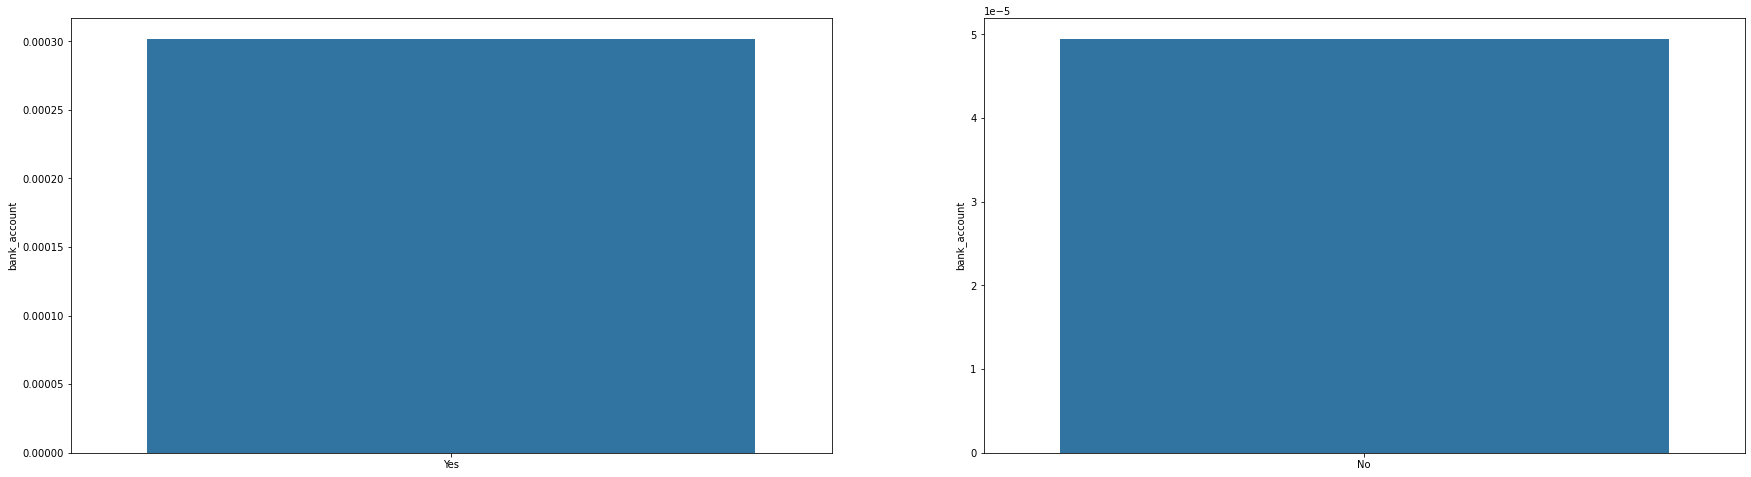

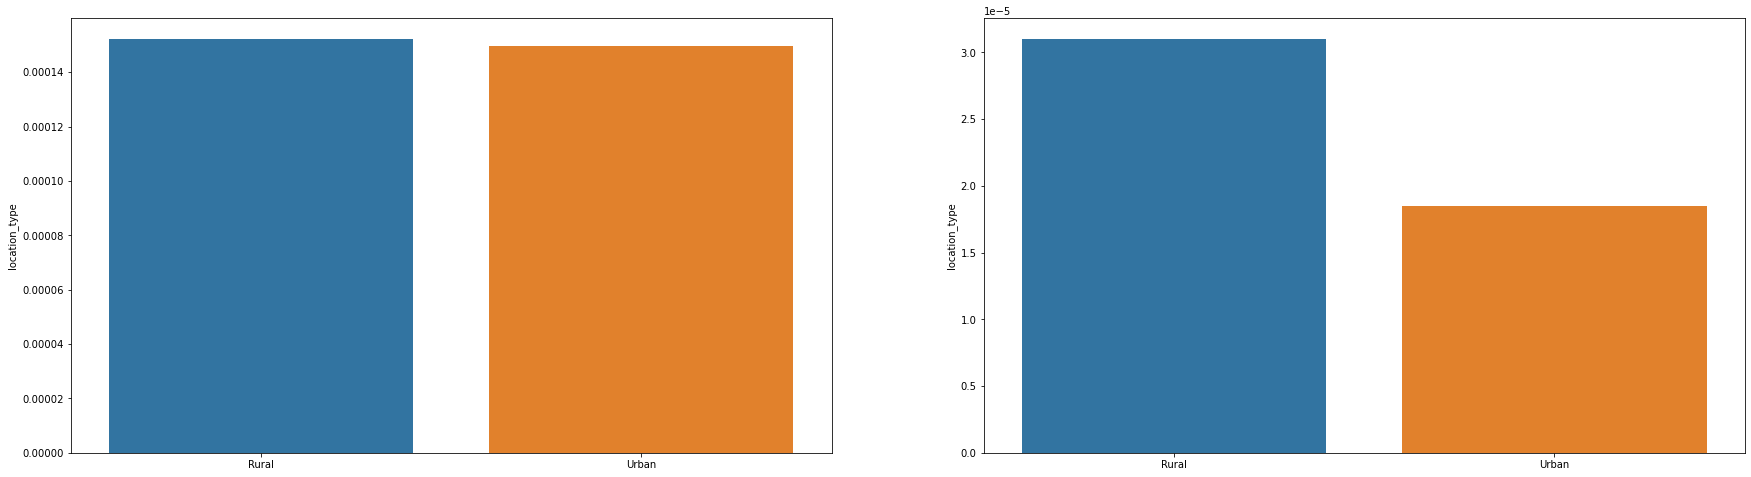

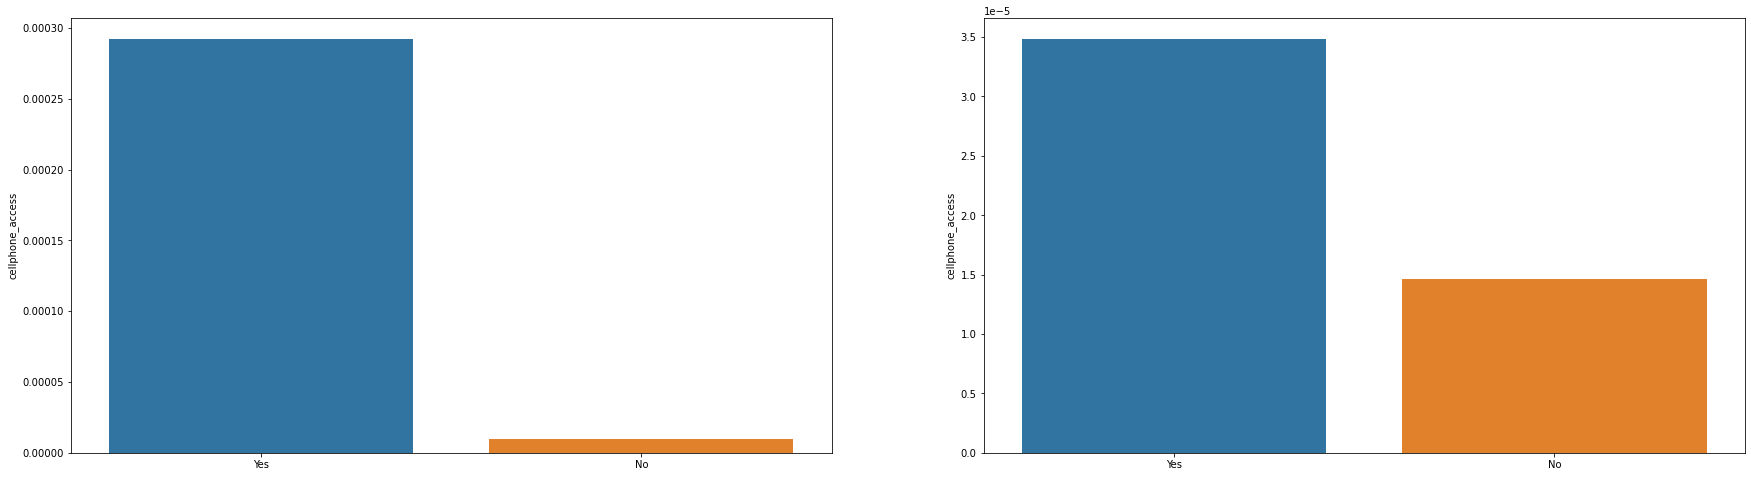

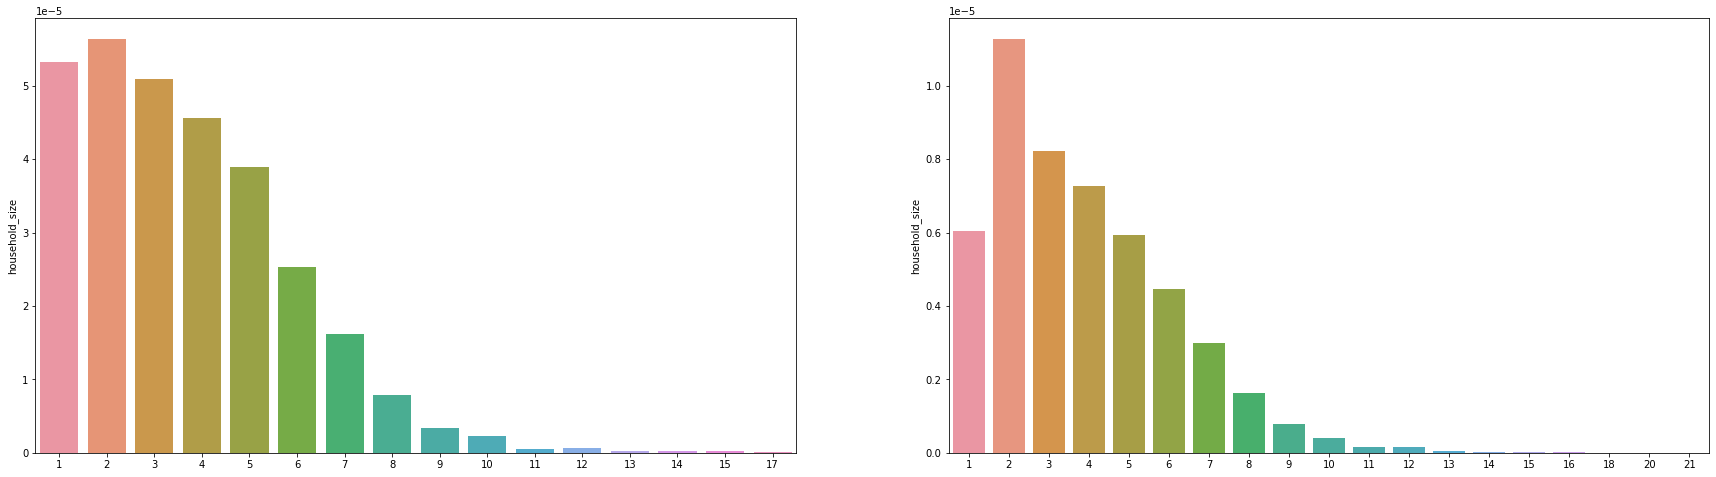

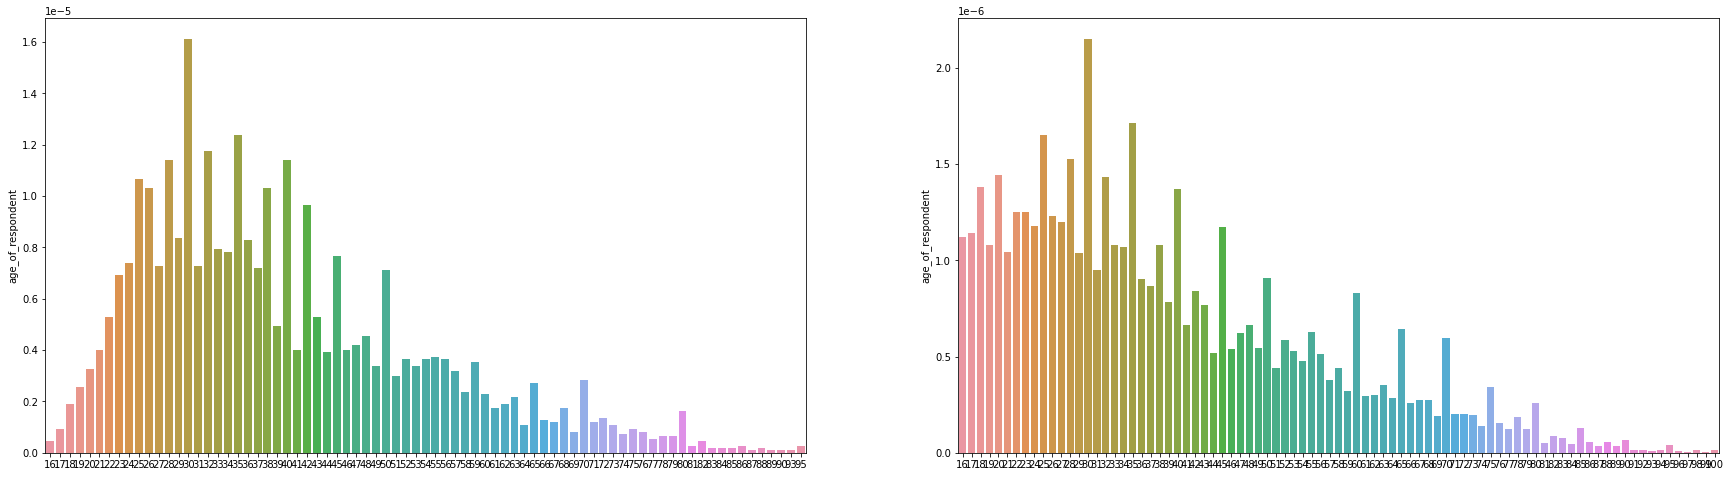

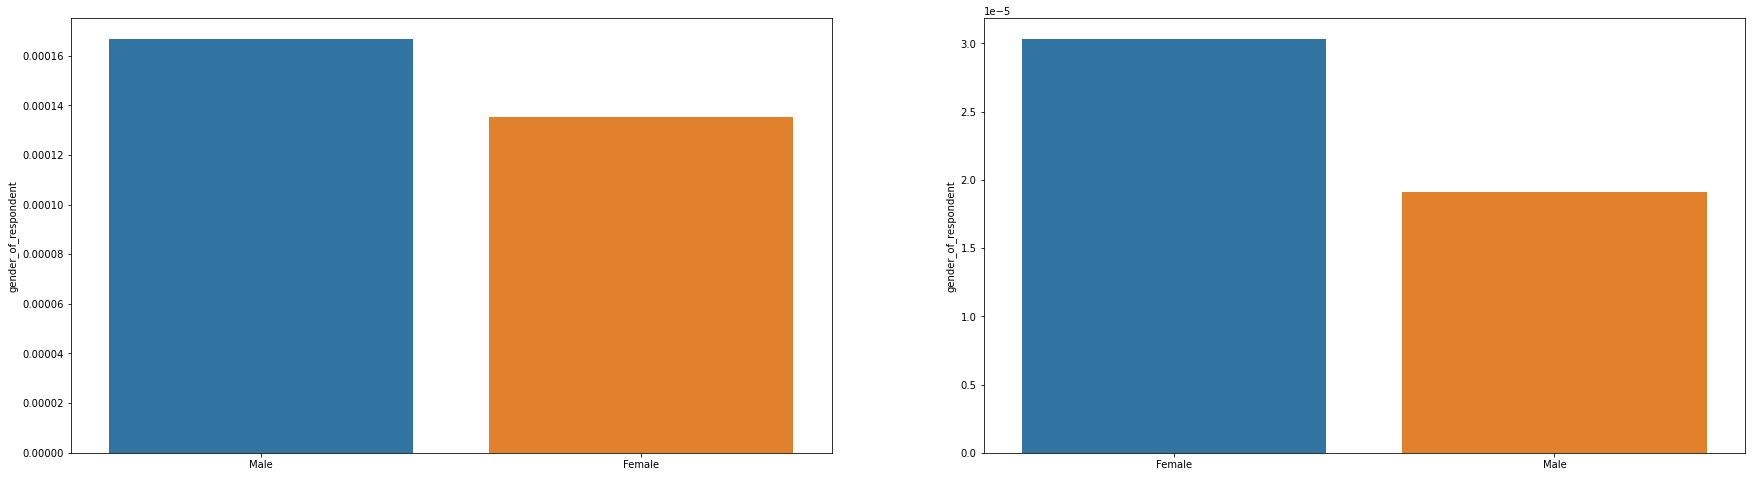

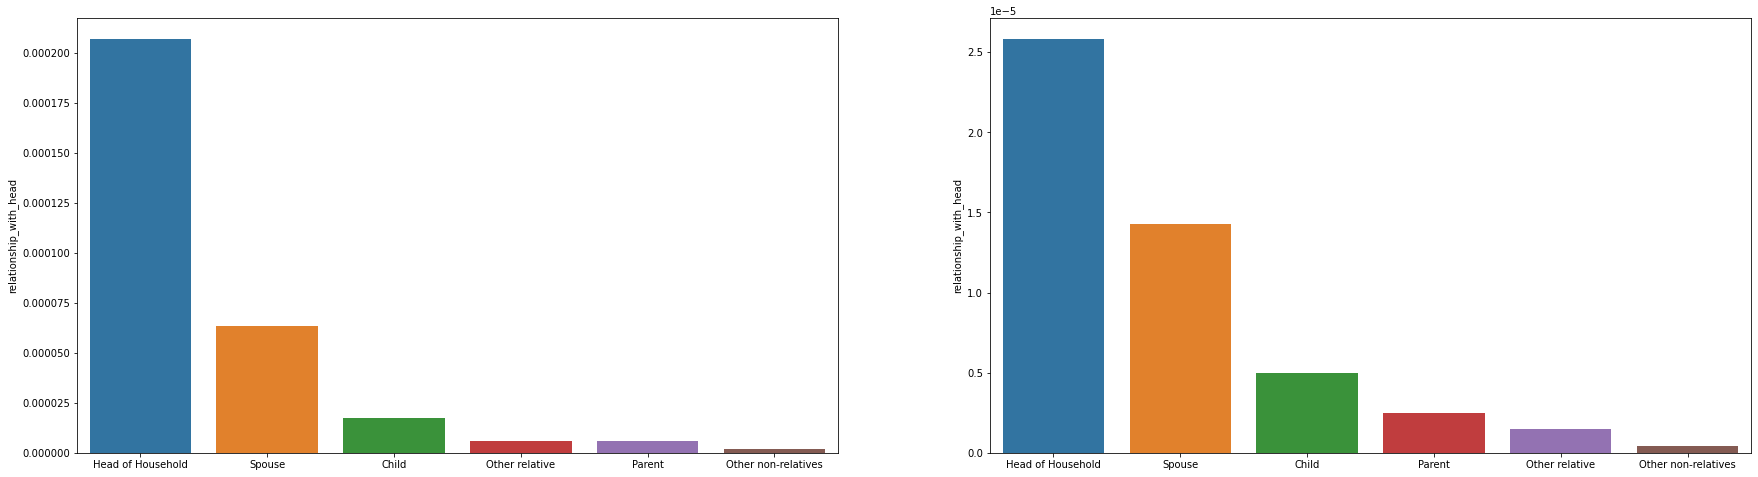

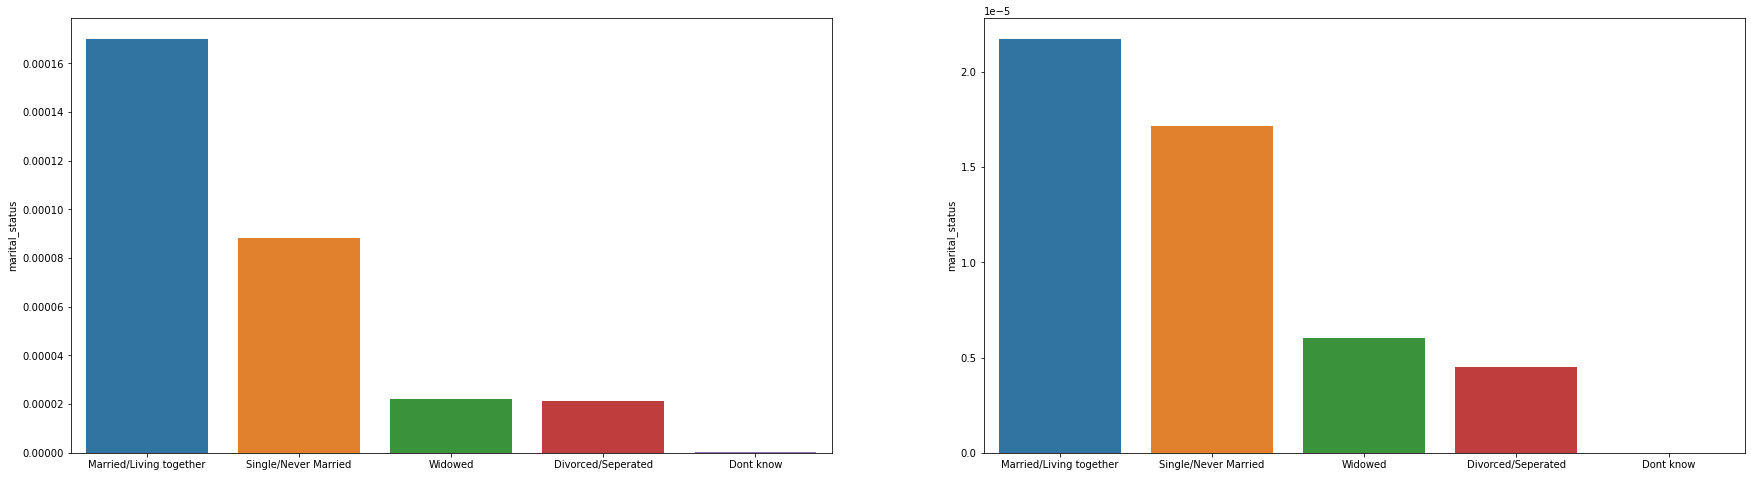

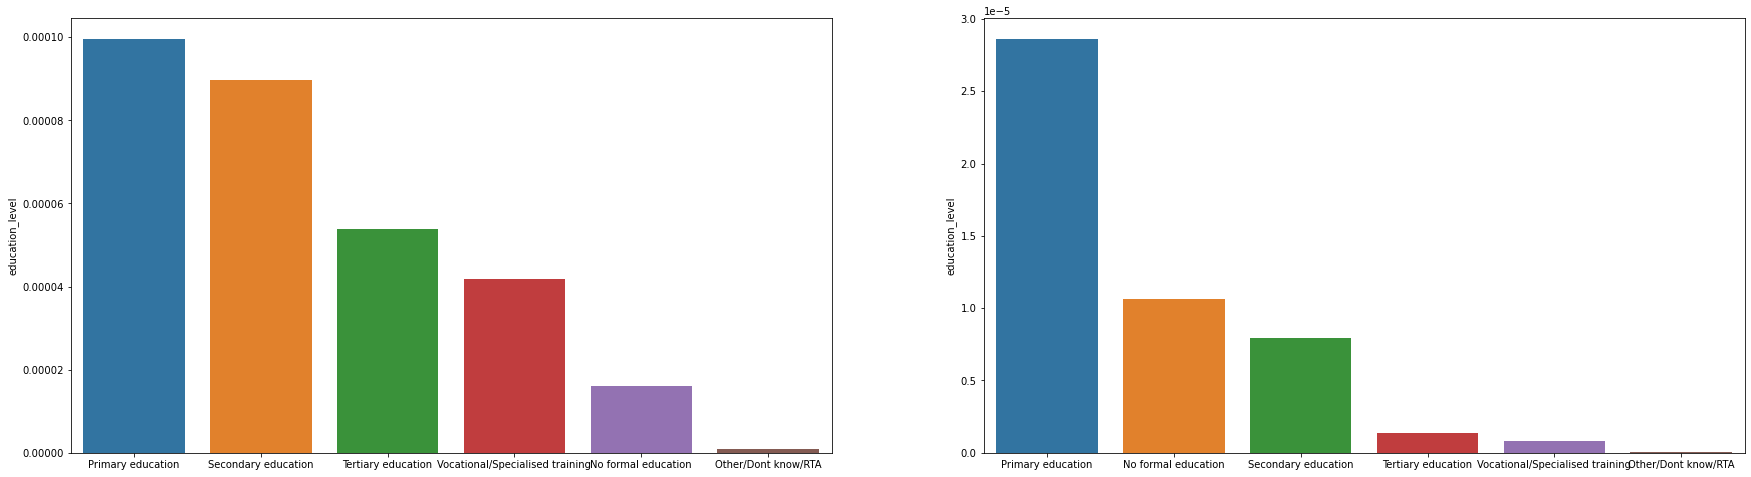

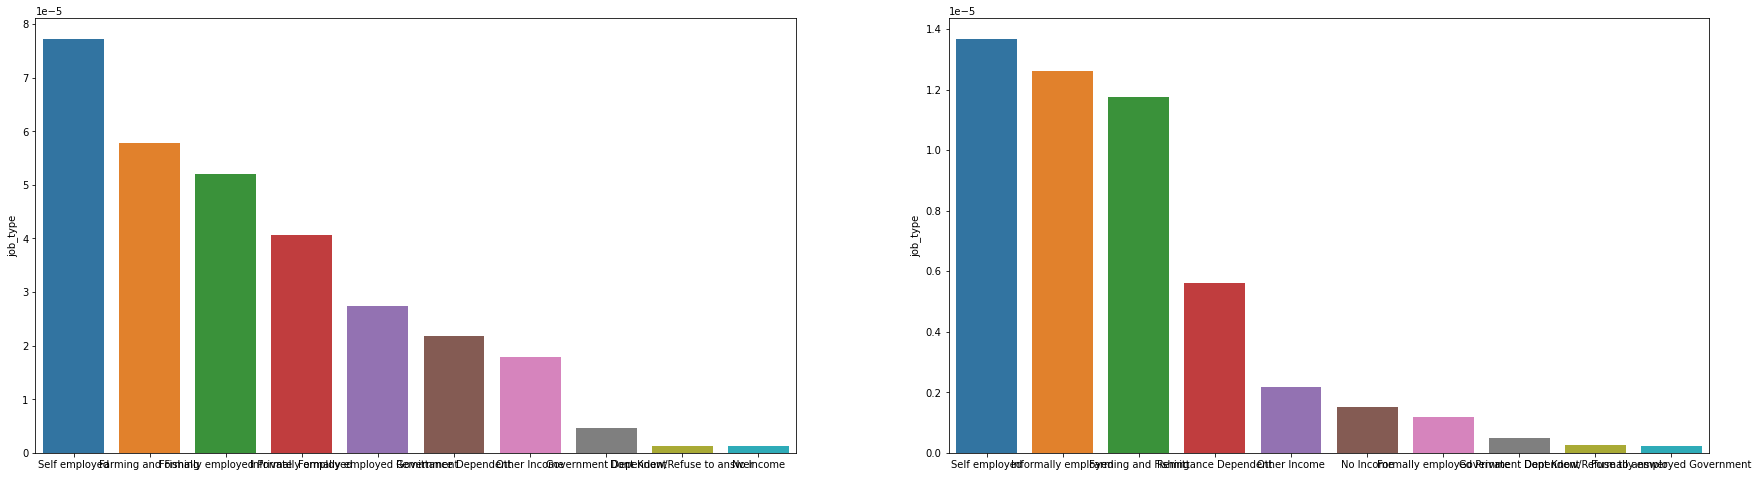

In [88]:
for col in cols_interested:
    col_dist_yes = pd.DataFrame(account_yes[col].value_counts(normalize=True)/len(account_yes))
    col_dist_no = pd.DataFrame(account_no[col].value_counts(normalize=True)/len(account_no))
    
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(30, 8))
    sns.barplot(x = col_dist_yes[col].index, y=col_dist_yes[col], ax=ax[0])
    sns.barplot(x = col_dist_no[col].index, y=col_dist_no[col], ax=ax[1])

In [89]:
# Train statistical summary
train.describe(include = 'all')

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524.000000,23524,23524,23524,23524,23524.000000,23524.000000,23524,23524,23524,23524,23524
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,6,10
top,Rwanda,NaN,uniqueid_1,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20212,14343,17454,NaN,NaN,13877,12831,10749,12791,6437
mean,NaN,2016.975939,NaN,NaN,NaN,NaN,3.797483,38.805220,NaN,NaN,NaN,NaN,NaN
std,NaN,0.847371,NaN,NaN,NaN,NaN,2.227613,16.520569,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,1.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [90]:
train.age_of_respondent.unique()

array([ 24,  70,  26,  34,  32,  42,  54,  76,  40,  69,  64,  31,  38,
        47,  27,  48,  25,  21,  18,  22,  58,  55,  62,  29,  35,  45,
        67,  19,  80,  66,  50,  33,  28,  51,  16,  17,  30,  37,  59,
        65,  46,  56,  52,  23,  43,  49,  44,  72,  53,  63,  39,  81,
        78,  36,  20,  60,  95,  71,  57,  85,  68,  41,  61,  75,  86,
        73,  93,  74,  88,  90,  77,  84,  82,  89,  79,  83,  94,  87,
        92,  91,  98,  97,  96,  99, 100])

In [91]:
i=0
for row in train.age_of_respondent:
    if 0 <= row <= 20:
        train.age_of_respondent.loc[i] = "<20"
    if 21 <= row <= 30:
        train.age_of_respondent.loc[i] = "<30"
    if 31 <= row <= 40:
        train.age_of_respondent.loc[i] = "<40"
    if 41 <= row <= 50:
        train.age_of_respondent.loc[i] = "<50"
    if 51 <= row <= 60:
        train.age_of_respondent.loc[i] = "<60"
    if 61 <= row <= 70:
        train.age_of_respondent.loc[i] = "<70"
    if 71 <= row <= 80:
        train.age_of_respondent.loc[i] = "<80"
    if 81 <= row <= 90:
        train.age_of_respondent.loc[i] = "<90"
    if 91 <= row <= 100:
        train.age_of_respondent.loc[i] = "<60"
    i+=1

/tmp/ipykernel_5328/4231589870.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.age_of_respondent.loc[i] = "<30"


In [92]:
for row in train.age_of_respondent:
    print(row)

<30
<70
<30
<40
<30
<30
<40
<50
<60
<80
<40
<70
<70
<40
<30
<40
<50
<30
<50
<30
<30
<40
<40
<30
<20
<30
<30
<40
<30
<60
<60
<40
<70
<30
<50
<50
<40
<50
<50
<70
<70
<20
<80
<70
<40
<50
<30
<40
<30
<30
<30
<60
<20
<20
<30
<70
<50
<40
<30
<30
<30
<70
<50
<30
<30
<30
<40
<30
<30
<30
<60
<30
<40
<30
<60
<40
<20
<30
<40
<50
<40
<20
<70
<20
<40
<50
<60
<30
<30
<70
<60
<40
<30
<20
<50
<30
<60
<40
<70
<50
<30
<50
<30
<50
<20
<30
<20
<50
<50
<30
<20
<50
<30
<50
<80
<20
<30
<60
<60
<40
<40
<20
<60
<20
<30
<30
<70
<50
<50
<20
<30
<70
<60
<50
<30
<30
<40
<90
<70
<80
<30
<30
<40
<50
<20
<50
<30
<40
<40
<30
<40
<80
<40
<20
<20
<30
<40
<30
<50
<40
<70
<40
<50
<30
<60
<40
<60
<50
<60
<40
<30
<50
<60
<70
<50
<70
<60
<40
<60
<50
<80
<20
<30
<60
<30
<40
<60
<50
<50
<70
<60
<50
<30
<40
<20
<20
<40
<30
<30
<50
<80
<50
<70
<30
<70
<60
<30
<50
<80
<60
<30
<40
<70
<20
<50
<40
<40
<30
<40
<30
<30
<20
<40
<30
<30
<70
<60
<70
<60
<70
<50
<30
<60
<30
<50
<30
<40
<40
<60
<40
<20
<30
<20
<20
<60
<40
<30
<80
<30
<30


<30
<30
<40
<40
<40
<30
<30
<80
<40
<60
<30
<40
<30
<30
<40
<30
<50
<20
<20
<30
<50
<40
<40
<60
<30
<50
<30
<70
<40
<70
<20
<30
<30
<20
<60
<80
<20
<50
<30
<50
<40
<30
<50
<20
<20
<50
<60
<70
<30
<70
<20
<40
<40
<60
<20
<20
<80
<50
<80
<80
<30
<70
<40
<30
<40
<80
<30
<30
<50
<40
<20
<20
<70
<40
<20
<50
<40
<20
<60
<40
<20
<20
<60
<70
<60
<70
<40
<40
<30
<30
<50
<40
<60
<40
<30
<40
<70
<30
<20
<20
<60
<30
<40
<50
<80
<40
<40
<40
<40
<70
<50
<20
<20
<40
<30
<30
<40
<30
<40
<50
<70
<70
<50
<30
<40
<40
<70
<90
<80
<50
<30
<50
<30
<80
<50
<60
<80
<80
<20
<40
<60
<30
<30
<50
<70
<60
<30
<40
<60
<20
<80
<40
<60
<40
<50
<40
<40
<50
<30
<30
<40
<40
<30
<50
<40
<70
<40
<30
<30
<40
<40
<80
<40
<30
<80
<40
<70
<40
<50
<50
<30
<20
<30
<20
<40
<40
<50
<60
<30
<70
<30
<70
<60
<50
<60
<30
<50
<40
<50
<40
<30
<40
<50
<40
<60
<50
<70
<30
<70
<60
<20
<70
<70
<30
<20
<50
<30
<30
<30
<90
<30
<60
<40
<40
<70
<90
<30
<30
<40
<50
<20
<30
<30
<40
<40
<30
<40
<40
<40
<40
<40
<40
<30
<50
<70
<60
<50
<70
<50
<50


<30
<40
<70
<40
<30
<70
<40
<40
<80
<40
<60
<60
<30
<70
<20
<70
<30
<30
<30
<30
<50
<60
<70
<40
<40
<20
<20
<60
<70
<30
<40
<30
<40
<60
<40
<90
<50
<70
<50
<40
<20
<50
<20
<30
<40
<70
<70
<70
<60
<20
<40
<40
<30
<40
<50
<60
<30
<40
<70
<30
<60
<20
<90
<40
<40
<40
<20
<50
<50
<20
<20
<70
<30
<60
<40
<40
<80
<60
<40
<20
<20
<20
<40
<40
<60
<60
<30
<50
<20
<50
<40
<30
<40
<20
<40
<40
<40
<40
<60
<50
<20
<30
<30
<30
<50
<70
<20
<70
<60
<30
<30
<30
<30
<50
<40
<70
<30
<20
<90
<30
<50
<30
<20
<30
<50
<40
<30
<80
<60
<40
<40
<60
<50
<20
<60
<40
<60
<50
<30
<40
<20
<60
<50
<40
<50
<60
<60
<20
<30
<90
<90
<20
<60
<40
<40
<50
<70
<40
<60
<40
<30
<50
<20
<30
<80
<30
<70
<30
<40
<40
<20
<60
<20
<80
<80
<40
<40
<30
<40
<50
<40
<30
<50
<20
<70
<80
<60
<40
<60
<30
<30
<60
<20
<60
<30
<20
<20
<30
<20
<80
<50
<20
<70
<50
<30
<30
<30
<60
<50
<40
<30
<50
<90
<20
<40
<90
<30
<30
<30
<50
<20
<30
<40
<80
<40
<50
<60
<30
<40
<30
<30
<20
<30
<20
<80
<30
<50
<30
<40
<60
<50
<60
<60
<30
<50
<20
<30
<30
<30
<40


<40
<20
<40
<30
<40
<70
<40
<30
<40
<50
<20
<30
<30
<50
<70
<30
<40
<40
<30
<40
<60
<30
<40
<40
<40
<50
<40
<30
<50
<70
<40
<40
<40
<20
<40
<40
<20
<60
<80
<40
<40
<40
<40
<20
<30
<40
<40
<40
<30
<60
<80
<40
<40
<30
<40
<40
<40
<40
<60
<20
<50
<70
<40
<30
<40
<30
<60
<50
<30
<20
<40
<50
<70
<40
<70
<40
<40
<40
<70
<50
<60
<30
<30
<50
<50
<30
<40
<20
<30
<50
<50
<40
<30
<50
<80
<30
<20
<20
<40
<60
<30
<50
<30
<20
<20
<50
<40
<70
<30
<30
<60
<40
<60
<30
<50
<20
<50
<40
<40
<50
<40
<40
<40
<20
<20
<40
<20
<40
<80
<70
<30
<40
<40
<60
<80
<30
<20
<20
<60
<40
<30
<60
<50
<30
<30
<30
<20
<30
<40
<20
<20
<20
<40
<80
<30
<30
<70
<30
<40
<20
<60
<40
<60
<30
<40
<40
<80
<50
<40
<40
<50
<40
<40
<50
<30
<60
<20
<30
<40
<60
<70
<20
<50
<30
<50
<30
<20
<40
<60
<50
<40
<40
<20
<40
<30
<50
<50
<50
<50
<30
<50
<70
<30
<50
<40
<40
<40
<40
<20
<50
<80
<40
<70
<20
<30
<30
<40
<40
<50
<40
<40
<20
<30
<30
<40
<40
<90
<30
<80
<40
<80
<50
<30
<50
<80
<80
<30
<40
<50
<60
<30
<70
<30
<30
<30
<40
<30
<40
<50
<30


<30
<60
<60
<50
<90
<60
<50
<40
<50
<30
<50
<30
<40
<40
<20
<40
<40
<50
<20
<40
<80
<30
<80
<30
<40
<70
<50
<60
<40
<50
<40
<70
<60
<30
<70
<70
<20
<20
<60
<50
<30
<40
<20
<40
<30
<40
<40
<40
<30
<20
<20
<30
<40
<40
<30
<20
<30
<60
<60
<70
<30
<30
<80
<30
<60
<40
<70
<60
<60
<40
<30
<60
<30
<30
<60
<70
<50
<40
<40
<80
<30
<60
<40
<50
<30
<30
<30
<60
<20
<30
<40
<30
<40
<70
<40
<60
<40
<40
<50
<30
<40
<50
<40
<40
<30
<40
<30
<60
<60
<30
<40
<50
<60
<80
<90
<40
<30
<30
<40
<30
<60
<60
<40
<50
<90
<30
<30
<60
<40
<40
<30
<60
<20
<50
<30
<20
<40
<30
<20
<40
<40
<30
<70
<20
<80
<40
<40
<20
<20
<30
<40
<80
<40
<60
<60
<30
<20
<40
<40
<40
<40
<70
<40
<60
<30
<30
<40
<40
<60
<80
<40
<70
<40
<80
<40
<40
<20
<60
<40
<30
<30
<30
<30
<50
<30
<30
<30
<30
<20
<20
<40
<30
<40
<60
<70
<70
<30
<50
<60
<60
<80
<40
<30
<70
<40
<30
<90
<60
<50
<30
<40
<70
<70
<50
<20
<40
<50
<60
<60
<20
<50
<30
<30
<60
<50
<80
<70
<40
<40
<80
<30
<40
<50
<60
<30
<20
<60
<60
<50
<30
<80
<30
<30
<40
<50
<50
<40
<70
<50
<20


<60
<40
<40
<40
<30
<40
<30
<40
<40
<40
<40
<30
<40
<50
<30
<50
<40
<40
<50
<40
<30
<20
<30
<60
<50
<30
<80
<20
<30
<20
<80
<50
<60
<30
<20
<40
<60
<40
<40
<30
<40
<40
<40
<30
<40
<30
<30
<50
<40
<30
<50
<20
<40
<40
<40
<60
<60
<40
<50
<50
<30
<20
<80
<30
<50
<20
<60
<20
<90
<40
<30
<30
<50
<50
<40
<50
<70
<50
<40
<20
<60
<80
<50
<70
<80
<50
<40
<40
<30
<40
<20
<40
<30
<80
<40
<40
<50
<60
<40
<60
<50
<20
<50
<40
<40
<40
<50
<20
<80
<60
<50
<20
<40
<40
<60
<30
<30
<60
<60
<30
<40
<80
<70
<60
<30
<50
<20
<40
<70
<30
<40
<70
<40
<30
<20
<30
<60
<40
<40
<50
<30
<30
<40
<20
<60
<90
<50
<30
<40
<30
<40
<60
<40
<40
<40
<40
<40
<20
<50
<50
<20
<30
<40
<30
<60
<60
<60
<70
<40
<60
<50
<40
<30
<30
<70
<60
<50
<90
<40
<30
<60
<70
<40
<20
<40
<40
<60
<50
<60
<40
<20
<40
<40
<40
<50
<40
<40
<30
<50
<50
<50
<60
<30
<30
<60
<30
<50
<70
<30
<40
<50
<70
<70
<50
<70
<40
<50
<30
<40
<60
<50
<50
<30
<30
<30
<30
<40
<30
<60
<30
<60
<40
<30
<20
<40
<30
<60
<30
<40
<50
<70
<30
<40
<60
<60
<30
<30
<50
<20
<20


<40
<30
<70
<70
<40
<40
<60
<30
<30
<20
<30
<50
<30
<20
<30
<40
<20
<30
<40
<70
<30
<20
<60
<30
<50
<70
<30
<20
<20
<40
<20
<30
<50
<30
<80
<30
<40
<40
<40
<30
<20
<30
<30
<50
<50
<70
<60
<70
<40
<20
<40
<40
<20
<30
<70
<50
<40
<70
<40
<80
<40
<50
<20
<30
<40
<50
<50
<30
<20
<30
<20
<60
<40
<50
<30
<30
<70
<30
<40
<20
<40
<20
<40
<90
<40
<50
<30
<30
<60
<30
<60
<30
<40
<30
<50
<60
<30
<40
<30
<30
<50
<30
<20
<30
<30
<80
<40
<70
<60
<40
<20
<40
<40
<20
<40
<40
<30
<50
<40
<30
<50
<90
<20
<30
<70
<50
<70
<80
<30
<30
<30
<70
<60
<70
<40
<50
<30
<40
<60
<20
<80
<20
<40
<30
<20
<40
<20
<40
<30
<40
<50
<60
<40
<50
<30
<30
<30
<40
<20
<70
<40
<50
<40
<20
<50
<70
<20
<30
<70
<30
<60
<70
<40
<40
<70
<40
<30
<30
<40
<30
<30
<30
<40
<30
<20
<30
<30
<40
<30
<50
<60
<50
<40
<40
<40
<30
<70
<80
<30
<30
<20
<40
<70
<40
<40
<30
<70
<50
<20
<30
<50
<50
<30
<30
<40
<30
<50
<40
<80
<30
<30
<60
<30
<60
<40
<60
<30
<50
<60
<30
<20
<50
<30
<80
<60
<40
<50
<50
<40
<40
<40
<50
<40
<60
<60
<20
<30
<40
<20
<40


<20
<30
<30
<30
<70
<40
<60
<30
<30
<30
<30
<30
<20
<60
<60
<30
<40
<30
<20
<20
<40
<20
<40
<50
<20
<50
<60
<30
<30
<60
<20
<70
<50
<20
<40
<30
<40
<20
<30
<30
<40
<60
<40
<60
<70
<20
<40
<30
<40
<60
<30
<30
<60
<50
<40
<30
<40
<50
<50
<20
<20
<50
<20
<30
<70
<50
<30
<20
<30
<60
<80
<40
<60
<40
<30
<40
<60
<50
<90
<40
<80
<50
<30
<40
<30
<70
<60
<20
<60
<20
<30
<20
<40
<40
<50
<40
<40
<20
<80
<60
<50
<30
<30
<20
<30
<40
<50
<60
<30
<40
<30
<20
<40
<20
<40
<40
<30
<20
<60
<50
<30
<40
<30
<40
<80
<20
<20
<20
<70
<50
<40
<30
<70
<60
<30
<60
<50
<20
<30
<80
<60
<50
<50
<80
<40
<40
<20
<60
<40
<30
<30
<60
<30
<60
<50
<20
<90
<20
<50
<40
<30
<40
<50
<20
<90
<70
<30
<50
<90
<70
<30
<30
<30
<40
<20
<30
<40
<30
<30
<30
<30
<50
<40
<40
<40
<30
<30
<30
<30
<20
<30
<40
<80
<40
<30
<30
<60
<60
<40
<40
<30
<50
<30
<80
<40
<40
<30
<50
<40
<50
<40
<30
<50
<30
<30
<90
<20
<40
<40
<60
<60
<30
<70
<40
<40
<40
<30
<40
<40
<40
<30
<40
<30
<30
<40
<30
<40
<40
<40
<30
<40
<50
<30
<20
<60
<80
<40
<30
<80
<30


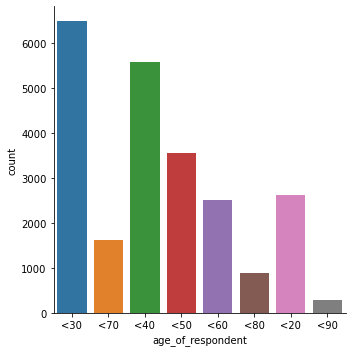

In [93]:
sns.catplot(x="age_of_respondent", kind="count", data=train)

In [94]:
i=0
for row in train.household_size:
    if 0 <= row <= 3:
        train.household_size.loc[i] = "<3"
    if 4 <= row <= 6:
        train.household_size.loc[i] = "<6"
    if 7 <= row <= 9:
        train.household_size.loc[i] = "<9"
    if 10 <= row <= 12:
        train.household_size.loc[i] = "<12"
    if 13 <= row <= 15:
        train.household_size.loc[i] = "<15"
    if 16 <= row <= 18:
        train.household_size.loc[i] = "<18"
    if 19 <= row <= 21:
        train.household_size.loc[i] = "<20"
    i+=1

/tmp/ipykernel_5328/1620215212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.household_size.loc[i] = "<3"


In [95]:
for row in train.household_size:
    print(row)

<3
<6
<6
<6
<9
<9
<9
<3
<3
<3
<6
<3
<6
<9
<6
<9
<3
<6
<3
<6
<6
<3
<6
<3
<9
<6
<9
<3
<6
<9
<6
<6
<6
<3
<12
<6
<6
<6
<9
<3
<6
<6
<3
<3
<3
<3
<3
<6
<6
<3
<3
<3
<6
<3
<3
<3
<6
<6
<12
<6
<9
<3
<3
<3
<6
<3
<3
<3
<6
<3
<3
<6
<6
<3
<6
<6
<6
<3
<6
<6
<9
<6
<6
<9
<3
<6
<3
<6
<6
<6
<3
<6
<12
<9
<3
<3
<9
<6
<3
<6
<12
<3
<3
<3
<6
<6
<6
<6
<9
<3
<3
<9
<3
<6
<9
<6
<3
<9
<6
<6
<6
<6
<9
<3
<6
<3
<9
<3
<6
<3
<6
<9
<3
<3
<6
<6
<6
<6
<3
<3
<3
<6
<6
<9
<6
<6
<6
<6
<6
<3
<9
<6
<6
<9
<3
<3
<3
<9
<6
<9
<3
<6
<9
<6
<6
<6
<9
<3
<3
<6
<6
<9
<3
<9
<6
<3
<9
<6
<3
<6
<3
<3
<6
<3
<3
<9
<6
<3
<3
<9
<3
<6
<3
<3
<9
<6
<9
<6
<3
<6
<3
<6
<6
<3
<3
<3
<6
<3
<6
<3
<6
<3
<3
<6
<6
<6
<6
<3
<6
<3
<6
<3
<6
<3
<6
<3
<3
<6
<3
<3
<6
<9
<3
<9
<9
<6
<3
<6
<3
<3
<3
<9
<3
<6
<3
<3
<3
<6
<9
<6
<3
<9
<6
<9
<6
<6
<3
<3
<3
<6
<6
<3
<6
<6
<6
<6
<3
<6
<3
<3
<9
<3
<6
<3
<3
<3
<3
<9
<3
<6
<6
<6
<6
<3
<3
<6
<3
<9
<6
<6
<3
<3
<3
<3
<6
<9
<6
<3
<3
<6
<6
<6
<9
<6
<3
<6
<9
<3
<6
<6
<6
<9
<6
<6
<6
<3
<3
<6
<6
<6
<9
<3
<6
<3
<3
<9
<3
<3
<6
<9
<6
<3


<3
<3
<12
<3
<9
<3
<3
<3
<6
<6
<6
<3
<9
<6
<3
<6
<9
<6
<9
<3
<9
<6
<3
<6
<3
<12
<3
<6
<6
<3
<3
<9
<3
<9
<3
<3
<3
<3
<3
<3
<3
<6
<6
<6
<6
<3
<3
<6
<3
<3
<6
<3
<9
<9
<3
<9
<6
<6
<3
<6
<6
<3
<12
<6
<6
<3
<3
<12
<3
<6
<3
<3
<6
<3
<6
<6
<3
<9
<3
<6
<6
<3
<3
<3
<3
<3
<3
<3
<3
<6
<9
<3
<9
<9
<6
<3
<3
<9
<6
<3
<3
<9
<6
<6
<3
<3
<3
<3
<6
<3
<6
<6
<6
<9
<3
<6
<3
<3
<6
<3
<3
<3
<6
<3
<3
<3
<6
<6
<6
<6
<3
<6
<9
<3
<6
<6
<3
<12
<3
<9
<15
<6
<3
<9
<3
<3
<6
<6
<3
<9
<6
<6
<3
<3
<6
<6
<6
<6
<6
<12
<6
<6
<6
<6
<3
<6
<3
<3
<3
<6
<3
<9
<12
<6
<6
<3
<3
<6
<3
<3
<9
<6
<6
<6
<9
<6
<6
<3
<3
<6
<3
<3
<9
<6
<9
<3
<6
<3
<9
<3
<6
<6
<3
<6
<6
<6
<9
<3
<3
<3
<9
<3
<3
<9
<6
<6
<3
<3
<3
<6
<3
<3
<15
<3
<6
<6
<3
<3
<6
<9
<3
<3
<6
<6
<6
<3
<6
<6
<3
<6
<3
<3
<3
<3
<3
<3
<3
<3
<6
<3
<6
<3
<3
<3
<6
<3
<6
<6
<6
<6
<6
<3
<6
<6
<9
<6
<3
<6
<9
<3
<3
<6
<6
<3
<3
<9
<6
<6
<6
<3
<3
<6
<3
<3
<9
<3
<9
<9
<9
<3
<6
<6
<6
<3
<3
<3
<9
<9
<9
<6
<3
<3
<15
<6
<9
<6
<3
<3
<9
<3
<6
<3
<3
<6
<3
<3
<3
<12
<3
<3
<6
<3
<6
<6
<3
<3
<6
<9
<6
<1

<3
<3
<3
<6
<3
<6
<3
<9
<3
<9
<9
<3
<6
<3
<3
<6
<6
<3
<6
<6
<3
<9
<3
<6
<6
<3
<9
<3
<3
<9
<6
<12
<9
<6
<3
<6
<3
<6
<3
<9
<6
<6
<3
<9
<6
<6
<3
<6
<6
<6
<3
<3
<9
<6
<3
<3
<3
<6
<9
<9
<6
<3
<9
<6
<6
<6
<6
<3
<3
<9
<6
<6
<6
<6
<6
<3
<6
<6
<6
<6
<6
<3
<6
<3
<6
<6
<6
<3
<6
<9
<6
<6
<9
<3
<9
<3
<6
<6
<6
<6
<6
<6
<3
<6
<6
<6
<3
<3
<6
<6
<9
<9
<3
<3
<3
<6
<6
<9
<6
<3
<3
<3
<6
<6
<6
<6
<6
<3
<6
<6
<3
<6
<9
<6
<3
<6
<3
<9
<9
<6
<3
<9
<6
<6
<9
<6
<9
<9
<6
<6
<9
<9
<6
<9
<6
<6
<3
<3
<6
<6
<3
<3
<3
<6
<6
<6
<6
<3
<3
<6
<6
<6
<6
<9
<6
<9
<3
<3
<6
<6
<3
<3
<6
<3
<3
<9
<6
<9
<6
<3
<3
<12
<6
<3
<9
<3
<9
<6
<3
<6
<6
<3
<6
<6
<6
<3
<6
<6
<6
<9
<3
<6
<6
<3
<9
<3
<6
<3
<6
<6
<6
<6
<6
<6
<9
<3
<3
<6
<6
<6
<3
<3
<3
<9
<3
<3
<6
<6
<6
<6
<3
<6
<6
<6
<3
<6
<3
<6
<6
<6
<3
<6
<9
<3
<6
<6
<3
<3
<6
<3
<3
<3
<3
<9
<9
<6
<9
<6
<3
<3
<3
<6
<6
<6
<6
<6
<9
<6
<6
<3
<3
<3
<3
<9
<9
<3
<9
<3
<3
<9
<3
<9
<3
<3
<6
<6
<3
<3
<6
<3
<6
<9
<3
<3
<6
<6
<3
<6
<9
<9
<3
<3
<6
<6
<3
<3
<6
<9
<6
<6
<6
<6
<6
<3
<6
<6
<3
<3
<9
<6
<6
<3
<3

<3
<6
<6
<3
<6
<3
<6
<6
<3
<6
<9
<3
<6
<6
<3
<6
<6
<6
<6
<3
<6
<6
<3
<3
<6
<3
<6
<3
<3
<3
<3
<3
<3
<9
<9
<3
<9
<3
<3
<9
<3
<3
<3
<6
<3
<6
<6
<6
<6
<6
<3
<3
<3
<6
<3
<9
<9
<6
<3
<3
<6
<3
<3
<6
<9
<6
<3
<6
<6
<9
<3
<6
<3
<6
<3
<9
<6
<12
<6
<9
<6
<3
<3
<6
<6
<3
<6
<6
<12
<6
<9
<3
<6
<3
<3
<6
<9
<6
<3
<3
<3
<6
<6
<6
<3
<6
<6
<9
<3
<6
<6
<3
<3
<6
<3
<3
<6
<3
<6
<6
<3
<3
<9
<3
<3
<6
<3
<3
<6
<6
<6
<6
<6
<6
<3
<9
<3
<6
<6
<6
<3
<6
<6
<9
<3
<3
<9
<6
<6
<6
<6
<3
<3
<6
<6
<6
<6
<3
<9
<6
<3
<6
<6
<6
<3
<6
<3
<6
<6
<9
<3
<6
<6
<3
<6
<6
<3
<6
<6
<3
<6
<6
<3
<6
<6
<6
<6
<3
<6
<12
<6
<6
<6
<3
<3
<6
<3
<9
<3
<6
<6
<3
<3
<3
<9
<6
<6
<6
<6
<9
<9
<6
<9
<6
<9
<9
<6
<9
<3
<3
<6
<3
<6
<3
<6
<6
<6
<3
<6
<6
<3
<6
<9
<3
<6
<3
<6
<6
<3
<6
<3
<3
<6
<6
<3
<3
<6
<3
<3
<3
<9
<6
<6
<6
<9
<3
<9
<3
<6
<6
<3
<3
<6
<6
<3
<3
<6
<3
<6
<3
<3
<6
<6
<3
<6
<3
<6
<3
<6
<3
<3
<6
<3
<3
<3
<3
<3
<3
<9
<6
<9
<6
<6
<6
<3
<6
<6
<9
<6
<6
<3
<3
<3
<6
<3
<6
<6
<3
<6
<6
<3
<6
<6
<3
<6
<6
<6
<12
<3
<6
<6
<6
<6
<9
<9
<6
<6
<3
<6
<3
<6
<9


<3
<6
<3
<3
<3
<3
<3
<3
<3
<3
<3
<6
<6
<3
<9
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<6
<3
<3
<3
<3
<3
<3
<3
<3
<6
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<6
<3
<3
<3
<3
<3
<3
<3
<3
<6
<3
<3
<3
<3
<3
<6
<6
<3
<3
<3
<6
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<6
<3
<6
<3
<3
<3
<3
<3
<6
<3
<3
<3
<3
<3
<3
<3
<3
<3
<6
<6
<3
<3
<3
<3
<6
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<6
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<6
<6
<3
<6
<6
<3
<3
<3
<3
<3
<3
<3
<3
<6
<3
<3
<6
<3
<6
<3
<3
<3
<3
<3
<3
<3
<3
<6
<3
<3
<6
<3
<6
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<6
<3
<3
<3
<3
<3
<3
<9
<3
<6
<3
<3
<3
<3
<3
<3
<6
<3
<3
<3
<9
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<6
<3
<6
<3
<3
<3
<3
<3
<3
<3
<3
<6
<6
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<6
<3
<3
<3
<3
<3
<3
<3
<6
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<3
<6
<9
<3
<3
<3
<3
<3
<3
<6
<

<3
<3
<12
<6
<6
<3
<6
<3
<3
<3
<9
<6
<9
<9
<3
<3
<3
<9
<9
<6
<6
<15
<6
<3
<6
<3
<3
<3
<3
<6
<6
<12
<6
<6
<6
<3
<6
<3
<6
<9
<6
<3
<3
<3
<6
<6
<9
<3
<3
<3
<3
<9
<6
<3
<9
<3
<3
<6
<12
<6
<6
<3
<3
<6
<9
<9
<3
<6
<3
<6
<6
<3
<3
<3
<3
<6
<9
<9
<3
<12
<3
<3
<6
<3
<3
<9
<3
<6
<6
<6
<6
<3
<9
<6
<6
<3
<3
<3
<3
<6
<6
<9
<12
<3
<9
<6
<9
<9
<6
<3
<3
<9
<3
<9
<6
<6
<6
<9
<6
<6
<12
<6
<9
<3
<6
<6
<9
<3
<3
<12
<12
<6
<3
<9
<9
<6
<6
<9
<6
<9
<3
<12
<6
<18
<3
<6
<3
<6
<6
<9
<3
<6
<6
<3
<6
<3
<9
<3
<6
<6
<12
<6
<6
<6
<9
<6
<3
<9
<3
<6
<3
<6
<9
<6
<9
<3
<9
<6
<3
<12
<3
<9
<3
<6
<9
<12
<3
<3
<9
<12
<3
<3
<6
<3
<3
<3
<6
<9
<6
<9
<6
<9
<9
<3
<3
<3
<6
<3
<6
<3
<12
<6
<9
<3
<3
<3
<3
<9
<6
<3
<6
<3
<9
<9
<6
<6
<9
<3
<12
<12
<9
<6
<3
<9
<9
<6
<6
<6
<3
<9
<3
<6
<9
<3
<3
<3
<3
<6
<3
<12
<3
<6
<3
<9
<6
<6
<9
<3
<6
<6
<12
<3
<6
<9
<3
<9
<9
<15
<6
<3
<9
<9
<3
<9
<6
<3
<6
<3
<6
<3
<6
<3
<6
<6
<6
<3
<3
<3
<9
<6
<3
<6
<3
<6
<12
<18
<3
<3
<3
<6
<9
<3
<3
<3
<9
<3
<6
<6
<6
<3
<9
<3
<9
<3
<9
<6
<3
<3
<6
<6
<6
<6
<3
<6
<6
<3

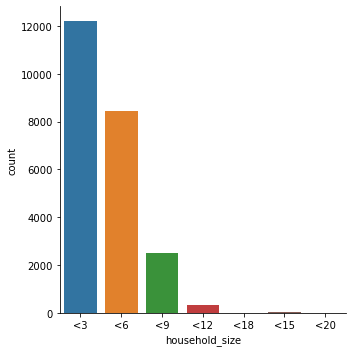

In [96]:
sns.catplot(x="household_size", kind="count", data=train)